In [34]:
import os
import sys

sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), ".."))

sys.path

['/home/jovyan/workspace/models/face_detection/yolov8-face/noteboooks',
 '/opt/conda/envs/yolov8-face/lib/python310.zip',
 '/opt/conda/envs/yolov8-face/lib/python3.10',
 '/opt/conda/envs/yolov8-face/lib/python3.10/lib-dynload',
 '',
 '/opt/conda/envs/yolov8-face/lib/python3.10/site-packages',
 '/opt/conda/envs/yolov8-face/lib/python3.10/site-packages/setuptools/_vendor',
 '/home/jovyan/workspace/models/face_detection/yolov8-face/noteboooks/..',
 '/home/jovyan/workspace/models/face_detection/yolov8-face/noteboooks/..']

In [35]:
import cv2
import matplotlib.pyplot as plt

BOX_COLOR = (255, 0, 0)  # Red
TEXT_COLOR = (255, 255, 255)  # White
LEFT_COLOR = (255, 0, 0)
CENTER_COLOR = (0, 255, 0)
RIGHT_COLOR = (0, 0, 255)


def clip(x, y, width, height, normalized=False):
    if normalized:
        x = x * width
        y = y * height
    x = max(x, 0)
    y = max(y, 0)
    x = min(x, width)
    y = min(y, height)
    x = int(round(x))
    y = int(round(y))
    return x, y


def visualize_bbox(
    img,
    bbox,
    landmark,
    landmark_mask,
    color=BOX_COLOR,
    thickness=2,
    radius=2,
    bbox_type="coco",
    landmark_normalized: bool = True,
):
    r"""Visualizes a single bounding box on the image
    Args:
        bbox: coco
    """

    if bbox_type == "coco":
        x_min, y_min, w, h = bbox
        x_min, x_max, y_min, y_max = (
            int(x_min),
            int(x_min + w),
            int(y_min),
            int(y_min + h),
        )
    elif bbox_type == "pascal_voc":
        x_min, y_min, x_max, y_max = bbox
    elif bbox_type == "albumentations":
        x_min, y_min, x_max, y_max = bbox
        x_min, y_min, x_max, y_max = (
            int(x_min * img.shape[1]),
            int(y_min * img.shape[0]),
            int(x_max * img.shape[1]),
            int(y_max * img.shape[0]),
        )
    elif bbox_type == "yolo":
        cx, cy, w, h = bbox
        x_min, y_min, x_max, y_max = cx - w / 2, cy - h / 2, cx + w / 2, cy + h / 2
        x_min, y_min, x_max, y_max = (
            int(x_min * img.shape[1]),
            int(y_min * img.shape[0]),
            int(x_max * img.shape[1]),
            int(y_max * img.shape[0]),
        )
    else:
        raise KeyError("bbox_type error")

    x_min, y_min, x_max, y_max = (
        int(round(x_min)),
        int(round(y_min)),
        int(round(x_max)),
        int(round(y_max)),
    )

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    if landmark is not None and landmark_mask is not None:
        if landmark_mask[0] > 0:
            img = cv2.circle(
                img,
                clip(
                    landmark[0],
                    landmark[1],
                    img.shape[1],
                    img.shape[0],
                    landmark_normalized,
                ),
                radius=radius,
                color=LEFT_COLOR,
                thickness=-1,
            )
        if landmark_mask[1] > 0:
            img = cv2.circle(
                img,
                clip(
                    landmark[2],
                    landmark[3],
                    img.shape[1],
                    img.shape[0],
                    landmark_normalized,
                ),
                radius=radius,
                color=RIGHT_COLOR,
                thickness=-1,
            )
        if landmark_mask[2] > 0:
            img = cv2.circle(
                img,
                clip(
                    landmark[4],
                    landmark[5],
                    img.shape[1],
                    img.shape[0],
                    landmark_normalized,
                ),
                radius=radius,
                color=CENTER_COLOR,
                thickness=-1,
            )
        if landmark_mask[3] > 0:
            img = cv2.circle(
                img,
                clip(
                    landmark[6],
                    landmark[7],
                    img.shape[1],
                    img.shape[0],
                    landmark_normalized,
                ),
                radius=radius,
                color=LEFT_COLOR,
                thickness=-1,
            )
        if landmark_mask[4] > 0:
            img = cv2.circle(
                img,
                clip(
                    landmark[8],
                    landmark[9],
                    img.shape[1],
                    img.shape[0],
                    landmark_normalized,
                ),
                radius=radius,
                color=RIGHT_COLOR,
                thickness=-1,
            )

    return img


def visualize(
    image,
    bboxes,
    landmarks,
    landmarks_mask,
    bbox_type="coco",
    thickness=2,
    radius=2,
    landmark_normalized: bool = True,
):
    img = image.copy()
    for bbox, landmark, landmark_mask in zip(bboxes, landmarks, landmarks_mask):
        img = visualize_bbox(
            img,
            bbox,
            landmark,
            landmark_mask,
            bbox_type=bbox_type,
            thickness=thickness,
            radius=radius,
            landmark_normalized=landmark_normalized,
        )
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(img)
    plt.show()

In [36]:
WEIGHTS = "../weights/yolov8n-face.pt"
IMAGE = "../images/test.jpg"
IMGSZ = 640

In [37]:
from ultralytics import YOLO

model = YOLO(WEIGHTS)

/home/jovyan/workspace/models/face_detection/yolov8-face/noteboooks/../ultralytics/nn/tasks.py:623: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map

In [38]:
import ultralytics

ultralytics.__version__

'8.0.134'

In [39]:
from ultralytics.yolo.utils.checks import check_imgsz

imgsz = check_imgsz(IMGSZ, stride=model.model.stride, min_dim=2)
imgsz

[640, 640]

In [40]:
model.model.stride

tensor([ 8., 16., 32.])

In [41]:
import cv2

image_origin = cv2.imread(IMAGE)
# image_origin = cv2.cvtColor(image_origin, cv2.COLOR_BGR2RGB)
image_origin.shape

(1150, 2048, 3)

In [42]:
import torch
import numpy as np

from ultralytics.yolo.data.augment import LetterBox

im = LetterBox(IMGSZ, auto=False, stride=model.model.stride)(image=image_origin)
im = np.expand_dims(im, axis=0)

im = im[..., ::-1].transpose((0, 3, 1, 2))  # BGR to RGB, BHWC to BCHW, (n, 3, h, w)
im = np.ascontiguousarray(im)  # contiguous
im = torch.from_numpy(im)
im = im.float()
im /= 255.0
im.shape

torch.Size([1, 3, 640, 640])

In [61]:
CONF = 0.5
IOU = 0.5
TOPK = 2000

In [62]:
import torch

preds = model.model(im)[0]
# 20 = 4 box + 1 class + 5 keypoint (x, y, conf)
print(preds.shape)

torch.Size([1, 20, 8400])


In [63]:
from ultralytics.yolo.utils import ops

preds = ops.non_max_suppression(
    preds,
    CONF,
    IOU,
    agnostic=True,
    max_det=TOPK,
    classes=None,
    nc=len(model.model.names),
)
len(preds[0])

159

In [64]:
preds[0][0]

tensor([445.8991, 378.1796, 489.9551, 433.6767,   0.8560,   0.0000, 456.3197, 398.9146,   0.9010, 477.1559, 397.5654,   0.8971, 465.5143, 408.9663,   0.9102, 458.6949, 418.1676,   0.9133, 476.0045, 417.0304,   0.9107])

In [65]:
pred = preds[0]
print(pred.shape)

pred[:, :4] = ops.scale_boxes(im.shape[2:], pred[:, :4], image_origin.shape).round()
boxes = pred[:, :6]

pred_kpts = (
    pred[:, 6:].view(len(pred), *model.model.kpt_shape) if len(pred) else pred[:, 6:]
)
pred_kpts = ops.scale_coords(im.shape[2:], pred_kpts, image_origin.shape)

boxes.shape, pred_kpts.shape

torch.Size([159, 21])


(torch.Size([159, 6]), torch.Size([159, 5, 3]))

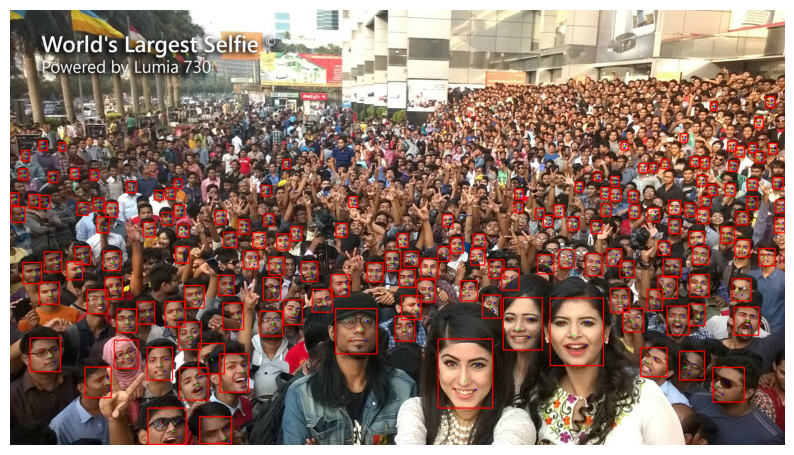

In [66]:
import numpy as np

visualize(
    cv2.cvtColor(image_origin, cv2.COLOR_BGR2RGB),
    boxes[:, :4].tolist(),
    pred_kpts[:, :, :2].contiguous().view(-1, 10).tolist(),
    pred_kpts[:, :, 2].tolist(),
    bbox_type="pascal_voc",
    landmark_normalized=False,
)